# Assignment 3: Stock price prediction using sklearn on structured data


You can edit this notebook to finish the assigned tasks and answer the questions.

You will need to work with files in this assignment. "%pwd" commands tell you the full path name of working directory and "%ls" list the files in it.

In [ ]:
%pwd

'/content'

In [ ]:
%ls

sample_data/  stocktrainingdata.csv


The "%ls" command should show you at least the two .csv data files, the .txt variable explanations files, and this jupyter notebook. If it doesn't, you may need to move those files to the working directory manually or change the working directory.

Next we can import the training data. We'll do this using pandas and numpy.

In [ ]:
import pandas as pd
import numpy as np

## 1 Data loading

The code below will import the .csv as a dataframe type object.

In [ ]:
trainingdata = pd.read_csv("stocktrainingdata.csv", header = 0)

In [ ]:
#If you want to see your data
trainingdata

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,$32.04,3.196532,0.901537,4.098069
1,2,$19.99,1.858204,0.461790,2.319993
2,3,$18.93,1.479520,0.324834,1.804355
3,4,$16.99,1.401072,0.363023,1.764096
4,5,$23.30,2.058146,0.607008,2.665154
...,...,...,...,...,...
75,76,$33.76,3.149658,0.446015,3.595673
76,77,$19.76,1.796936,0.382118,2.179054
77,78,$33.27,3.083121,0.239894,3.323015
78,79,$18.07,1.695720,0.546037,2.241758


In [ ]:
#If you want to see the data type of each column
trainingdata.dtypes

Firm ID number                     int64
Stock price                       object
Permanent Earnings per share     float64
Transitory Earnings per share    float64
Earnings per share               float64
dtype: object

## 2 Data clean

Then we need to clean the data a bit.

#### 2.1 **Question**: In some obervations, the variables are missing. Please drop these observations.

In [ ]:
# Enter code here to drop the observations which has missing variables
trainingdata = trainingdata.dropna()

# If you want to see the data again
trainingdata

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,$32.04,3.196532,0.901537,4.098069
1,2,$19.99,1.858204,0.461790,2.319993
2,3,$18.93,1.479520,0.324834,1.804355
3,4,$16.99,1.401072,0.363023,1.764096
4,5,$23.30,2.058146,0.607008,2.665154
...,...,...,...,...,...
75,76,$33.76,3.149658,0.446015,3.595673
76,77,$19.76,1.796936,0.382118,2.179054
77,78,$33.27,3.083121,0.239894,3.323015
78,79,$18.07,1.695720,0.546037,2.241758


## 3 Data preprocess

#### 3.1 **Question**: Can you find stock price in the "trainingdata"? How to read it into dataframe "traningdata" as a number instead of a string? Hint: you need to add a converter for the relevant column. Refer to https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html**

In [ ]:
# Enter code here to remove the dollar sign in the stock price
trainingdata['Stock price'] = trainingdata['Stock price'].str.replace('$', '').astype(float)

<ipython-input-9-45e7b6a98632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingdata['Stock price'] = trainingdata['Stock price'].str.replace('$', '').astype(float)


In [ ]:
trainingdata

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,32.04,3.196532,0.901537,4.098069
1,2,19.99,1.858204,0.461790,2.319993
2,3,18.93,1.479520,0.324834,1.804355
3,4,16.99,1.401072,0.363023,1.764096
4,5,23.30,2.058146,0.607008,2.665154
...,...,...,...,...,...
75,76,33.76,3.149658,0.446015,3.595673
76,77,19.76,1.796936,0.382118,2.179054
77,78,33.27,3.083121,0.239894,3.323015
78,79,18.07,1.695720,0.546037,2.241758


In [ ]:
# Convert object data type to numeric data type
trainingdata['Stock price'] = pd.to_numeric(trainingdata['Stock price'], errors='coerce')
# Enter code here to convert other columns into numeric data types
trainingdata['Permanent Earnings per share'] = pd.to_numeric(trainingdata['Permanent Earnings per share'], errors='coerce')
trainingdata['Transitory Earnings per share'] = pd.to_numeric(trainingdata['Transitory Earnings per share'], errors='coerce')
trainingdata['Earnings per share'] = pd.to_numeric(trainingdata['Earnings per share'], errors='coerce')

<ipython-input-11-9a38422d841b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingdata['Stock price'] = pd.to_numeric(trainingdata['Stock price'], errors='coerce')
<ipython-input-11-9a38422d841b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingdata['Permanent Earnings per share'] = pd.to_numeric(trainingdata['Permanent Earnings per share'], errors='coerce')
<ipython-input-11-9a38422d841b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [ ]:
trainingdata.dtypes

Firm ID number                     int64
Stock price                      float64
Permanent Earnings per share     float64
Transitory Earnings per share    float64
Earnings per share               float64
dtype: object

## 4 Exploratory data analysis

#### 4.1 **Question**: Find the relationship between the Earnings per share and stock price by plotting stock price against it

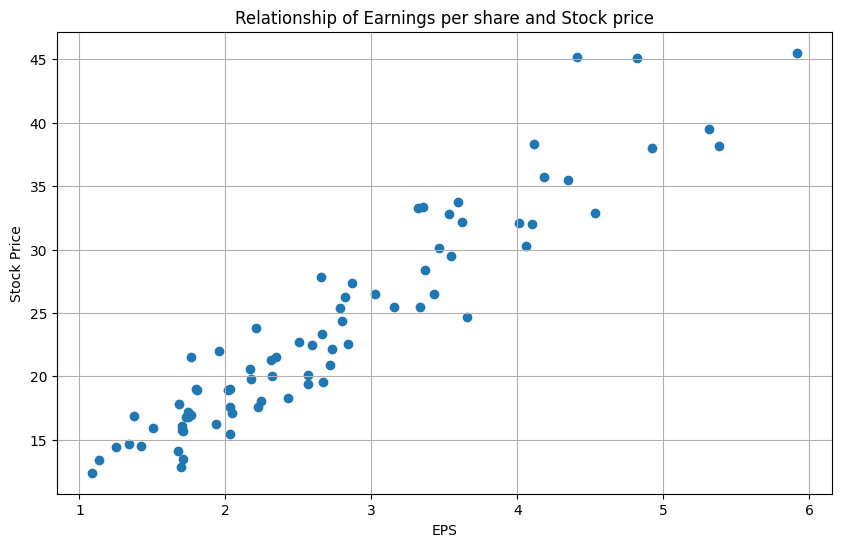

In [ ]:
#Enter code here to plot the relationship
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(trainingdata['Earnings per share'], trainingdata['Stock price'])
plt.title('Relationship of Earnings per share and Stock price')
plt.xlabel('EPS')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

#### 4.2 **Question**:  Comment on the relationships above.

a.Is it a positive or negative relationship, or is there no relationship?

b.How does stock price change for a unit change in Earnings per share ?

In [ ]:
print (len(("a.The relationship between Earnings per share and Stock price is positive").split()))
print (len(("b.For each unit change in Earnings per share, stock price changes roughly 5 dollars").split()))

11
14


#### 4.3 **Question**: Find the relationship between the Transitory Earnings per share and stock price by plotting stock price against it

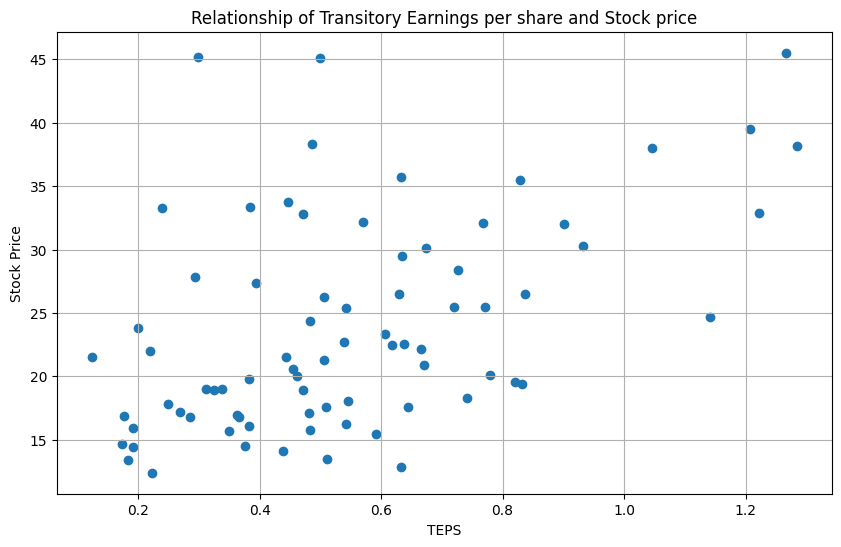

In [ ]:
#Enter code here to plot the relationship
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(trainingdata['Transitory Earnings per share'], trainingdata['Stock price'])
plt.title('Relationship of Transitory Earnings per share and Stock price')
plt.xlabel('TEPS')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

#### 4.4 **Question**:  Comment on the relationships above.

a.Is it a positive or negative relationship, or is there no relationship?

b.How does stock price change for a unit change in Transitory Earnings per share ?

In [ ]:
print (len(("a.There seems to be no relationship between Transitory Earnings per share and Stock price").split()))
print (len(("Since there's no relationship, the TEPS change seems to have no effect on the change in Stock price ").split()))

14
18


#### 4.5 **Question**: Find the relationship between the Permanent Earnings per share and stock price by plotting stock price against it

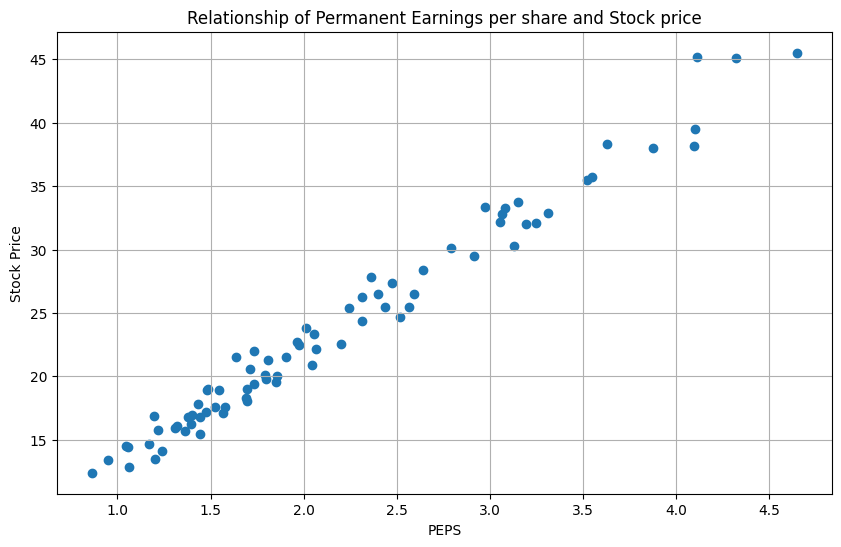

In [ ]:
#Enter code here to plot the relationship
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(trainingdata['Permanent Earnings per share'], trainingdata['Stock price'])
plt.title('Relationship of Permanent Earnings per share and Stock price')
plt.xlabel('PEPS')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

#### 4.6 **Question**:  Comment on the relationships above.

a.Is it a positive or negative relationship, or is there no relationship?

b.How does stock price change for a unit change in Permanent Earnings per share ?

In [ ]:
print (len(("a.This is a positive relationship").split()))
print (len(("b. For each unit change in PEPS, there's about a 10 dollar change in Stock price").split()))

5
16


## 5 Predictive data analysis

#### **5.1** Question: Typically predictive data anlyasis goes through a list of processes below. Please identify the steps we used in this section 5 for each process.
* Split dataset for traning and testing
* Extract features
* Build a ML model
* Train the model
* Make predictions
* Evaluate the modle

In [34]:
print (len("Split dataset --- step numbers related are 5.2"))
print (len("Extract features --- step numbers related are 5.2"))
print (len("Build a ML model --- step numbers related are 5.3"))
print (len("Train the model --- step numbers related are 5.4"))
print (len("Make predictions --- step numbers related are 5.4"))
print (len("Evaluate the model --- step numbers related are 6"))

46
49
49
48
49
49




#### **5.2** Question:The next two lines split the data into two chunks. Train_X is the features and their values from the training dataset. Train_y is the class value that we want to predict.Note that we have removed Earnings per share from trainging data. Please explain why we remove the Earnings per share from training data.


In [ ]:
trainingdata

,Firm ID number,Stock price,Permanent Earnings per share,Transitory Earnings per share,Earnings per share
0,1,32.04,3.196532,0.901537,4.098069
1,2,19.99,1.858204,0.461790,2.319993
2,3,18.93,1.479520,0.324834,1.804355
3,4,16.99,1.401072,0.363023,1.764096
4,5,23.30,2.058146,0.607008,2.665154
...,...,...,...,...,...
75,76,33.76,3.149658,0.446015,3.595673
76,77,19.76,1.796936,0.382118,2.179054
77,78,33.27,3.083121,0.239894,3.323015
78,79,18.07,1.695720,0.546037,2.241758


In [ ]:
#This creates an array of features that includes all features except 'Stock price', 'Firm ID' and 'Earnings per share'. 'Stock price' is which is what we want to predict
Train_X = np.array(trainingdata.drop(['Stock price','Firm ID number','Earnings per share'],axis=1))
trainingdata
#This creates an array that includes ONLY 'Stock price'
Train_y = np.array(trainingdata['Stock price'])

print (Train_X)

[[3.19653179 0.90153705]
 [1.85820369 0.46178973]
 [1.4795202  0.32483443]
 [1.40107239 0.3630233 ]
 [2.05814561 0.60700828]
 [1.79033816 0.77874396]
 [1.21885946 0.48342037]
 [3.55003675 0.63357135]
 [1.39617523 0.54307525]
 [1.69048789 0.74201866]
 [1.31107405 0.19085943]
 [1.90344157 0.44318224]
 [1.47757957 0.2691265 ]
 [3.63104113 0.48624679]
 [4.1135737  0.29846235]
 [1.69484522 0.33852236]
 [1.97484161 0.61750405]
 [3.31353755 1.22257905]
 [3.24790425 0.76765034]
 [2.56401123 0.77061744]
 [1.05627491 0.19146827]
 [2.59112129 0.83732831]
 [2.36439895 0.29369672]
 [1.80834035 0.50686003]
 [1.19800715 0.17651901]
 [2.01182967 0.20026529]
 [2.47252569 0.39471555]
 [3.87687688 1.04604605]
 [2.31507315 0.48380023]
 [1.48458469 0.31205416]
 [4.09821332 1.2840823 ]
 [1.44561157 0.28582042]
 [4.10476072 1.20696325]
 [4.32210384 0.49879904]
 [1.56618979 0.48069595]
 [1.36096951 0.34921646]
 [3.05324288 0.56973995]
 [0.95084974 0.18398197]
 [1.71230431 0.45456738]
 [0.86388546 0.22323857]


In [ ]:
print (len(("We are removing Earnings per share because Permanent EPS + Transitory EPS equals Earnings per share. So we are roving it to reduce redindancy").split()))

24


#### **5.3** Question: Next we actually make the predictor. We're using Linear Regression([documentation if you're interested](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) from sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Train_X, Train_y)

#### **5.4** Question: Let's test it out. The following code takes a hand-entered set of data and predicts the stock price:

In [ ]:
#You can play with this
prediction = reg.predict(np.array([[1,2],[1,3]]))

print('Prediction:', prediction)

Prediction: [5.64234869 1.06525631]


Then Let's print out the cofficients and intercept.

In [ ]:
# coefficeints of the trained model
print('\nCoefficient of model :', reg.coef_)

# intercept of the model
print('\nIntercept of model',reg.intercept_)


Coefficient of model : [ 9.78586909 -4.57709238]

Intercept of model 5.0106643563804525


#### **5.5** Question: The next thing we need to do is to import the test set (stocktestdata.csv) and see how good our classifier is at predicting the values there. Do this, following the same steps as above to import and convert to arrays. Put the features in an array called 'Test_X' and the class (Stock price) in an array called 'Test_y'.

In [ ]:
# Write code here to import the test data and convert into arrays
testingdata = pd.read_csv("stocktestdata.csv", header = 0)
testingdata['Stock price'] = testingdata['Stock price'].str.replace('$', '').astype(float)
testingdata['Stock price'] = pd.to_numeric(testingdata['Stock price'], errors='coerce')
Test_X = np.array(testingdata.drop(['Stock price','Firm ID number','Earnings per share'],axis=1))
testingdata
#This creates an array that includes ONLY 'Stock price'
Test_y = np.array(testingdata['Stock price'])

In [ ]:
 print (Test_X.shape, Test_y.shape)

(20, 2) (20,)


#### **5.6** Question:Once you've properly imported the test set data, cleaned it, and put it into arrays, the following code should predict the stock price using the predictor you trained on the training data as applied to the attributes in the testing data. It will output your predictions and then the actual values.

In [ ]:
#DO NOT EDIT THIS
Test_y_predicted = reg.predict(Test_X)

Test_y_predicted, Test_y

(array([14.75802427, 19.93491969, 27.31284421, 38.06346991, 20.10361726,
        24.23432817, 18.72627082, 23.07015695, 12.88938779, 17.09813371,
        21.95322379, 18.20480829, 44.61523762, 21.2452249 , 32.34192656,
        19.40606156, 19.0159723 , 33.32972583, 30.85611045, 20.85105262]),
 array([13.7 , 18.88, 28.2 , 39.09, 20.05, 23.17, 18.7 , 24.19, 12.85,
        17.45, 21.92, 19.16, 43.51, 21.16, 31.39, 18.33, 18.97, 32.2 ,
        30.73, 20.9 ]))

#### **5.7** Question: To evaluate the model, which metrics are you going to choose? and why you choose that metrics?

In [ ]:
print (len(("I'm going to choose the mean absolute error because it'll show comparisons between predicted versus observed").split()))

#### **5.8** Question: In the following box, write code to calculate and print out your "accuracy" for the model.

In [35]:

#CALCULATE AND PRINT OUT YOUR ACCURACY SCORE
#HINT: from sklearn import metrics
from sklearn import metrics
mae = metrics.mean_absolute_error(Test_y, Test_y_predicted)
print('Accuracy score =', mae)

Accuracy score = 0.6119782664067621


### 6 CONCLUSION
Let's make a summary and answer the questions in the background section of the doc file.

#### **6.1** Question: Since we already trained a regression model to predict the stock price, can you tell what is the relation between earnings per share and stock price? Hint: please check the coefficients and analyze the relationship between independent variable and depent variable.

In [ ]:
print (len(("The relationship between EPS and Stock price is positive since for each unit increase of EPS, stock price increases around $5.20 ").split()))

#### **6.2** Question Which firms would you recommend to invest in, and why.

In [ ]:
print (len(("I would recommend investing in firms where the actual stock price is less than the predicted because this shows an opportunity to make more money on the actual stock price based on the EPS").split()))